<a href="https://colab.research.google.com/github/GuilhermeSouza852002/Aplica-o-Web-baseado-em-Flask-e-SQLAlchemy/blob/main/OnePunchManOriginal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
char_path = r'/content/drive/MyDrive/OnePunchManIA/Imagens/Train'

char_names = []
for char in os.listdir(char_path):
    char_names.append(char)
char_names.sort()

data = tf.keras.utils.image_dataset_from_directory(char_path)

Found 585 files belonging to 7 classes.


In [4]:
len(char_names)

7

In [5]:
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.2)
val_size = int(len(data) * 0.1)

train_size, test_size, val_size, train_size + test_size + val_size

(13, 3, 1, 17)

In [6]:
normalization = layers.Rescaling(1./255)

normalized_ds = data.map(lambda x, y: (normalization(x), y))

train_ds = normalized_ds.take(train_size)
remaining_ds = normalized_ds.skip(train_size)
test_ds = remaining_ds.take(test_size)
val_ds = remaining_ds.skip(test_size)

In [7]:
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
np.min(first_image), np.max(first_image)

(0.0, 1.0)

In [8]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(256, 256, 3)))

model.add(layers.Conv2D(64, 9, padding='valid', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, 9, padding='valid', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, 9, padding='valid', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(char_names)))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [10]:
model.summary()

hist = model.fit(train_ds, validation_data=val_ds, epochs=60)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 64)      15616     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 64)      331840    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        3

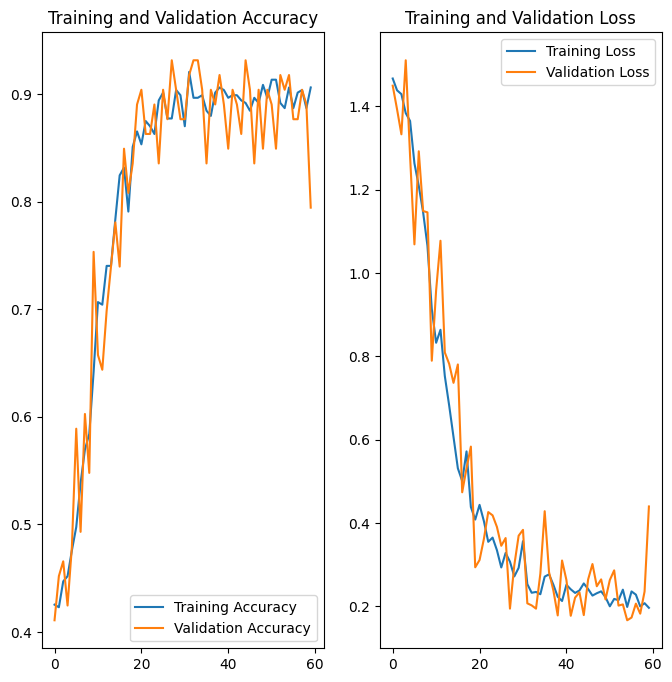

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(60)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


3/3 [==============================] - 15s 86ms/step - loss: 0.1844 - accuracy: 0.9271
Test Loss: 0.18443362414836884
Test Accuracy: 0.9270833134651184


In [14]:
test_images = []
test_labels = []
for image, label in test_ds:
    test_images.append(image)
    test_labels.append(label.numpy())

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

predictions = np.argmax(model.predict(test_images), axis=-1)

3/3 [==============================] - 0s 74ms/step


ValueError: ignored

<Figure size 1000x800 with 0 Axes>

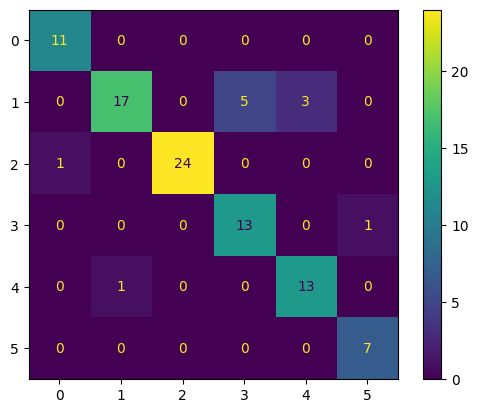

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predictions)
  # Substitua pelos nomes das suas classes

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=char_names)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot()
plt.title('Confusion Matrix - Test Set')
plt.show()